Seasonal Analysis

We load the extracted cases with animals and preview the initial rows to understand the structure of our data.

In [2]:
import pandas as pd

# Load the data
file_path = 'animal_cases.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

C:\Users\10043\AppData\Local\Temp\ipykernel_3152\485689844.py:5: DtypeWarning: Columns (13,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year,animal
0,101000295622,2011-07-01 02:44:50,2011-07-04 02:44:49,2011-07-01 02:44:55,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 16,1602,305 Freeport St,2122,42.302020,-71.051911,0101000020E6100000AC4EA98052C351C098735293A826...,Employee Generated,2011,Animal
1,101000295636,2011-07-01 03:44:54,2011-07-04 03:44:53,2011-07-01 05:19:44,ONTIME,Closed,Case Closed Case Resolved Pickup Dead Animal (...,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1801,10 Ledgebrook Rd,2126,42.270690,-71.083371,0101000020E61000009AEA0EF255C551C0821CA0F4A522...,Constituent Call,2011,Cats
2,101000295715,2011-07-01 04:40:53,2011-07-04 04:40:53,2011-07-01 05:18:50,ONTIME,Closed,Case Closed Case Resolved,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 2,0202,114 Sixteenth St,2129,42.379345,-71.051074,0101000020E6100000EA197ECD44C351C06EBE625C8E30...,Constituent Call,2011,Animal
3,101000295859,2011-07-01 06:51:01,2011-07-04 06:51:00,2011-07-01 06:51:08,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 15,1504,10 Hendry St,2125,42.308970,-71.064861,0101000020E61000004562F4AC26C451C0B1264B508C27...,Employee Generated,2011,Animal
4,101000295903,2011-07-01 07:46:49,2011-07-04 07:46:45,2011-07-01 09:15:33,ONTIME,Closed,Case Closed Case Resolved picked up,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1813,69 Davison St,2136,42.257640,-71.117461,0101000020E6100000F91C537A84C751C0FE88B655FA20...,Employee Generated,2011,Animal


We process the data by extracting the date information and categorizing each entry by the season in which it occurred.

In [3]:
data['open_dt'] = pd.to_datetime(data['open_dt'], errors='coerce')

data['month'] = data['open_dt'].dt.month
data['year'] = data['open_dt'].dt.year

def label_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['season'] = data['month'].apply(label_season)

seasonal_complaints = data.groupby(['year', 'season']).size().unstack(fill_value=0)

Visualize the data to better understand the seasonal trends in complaints.

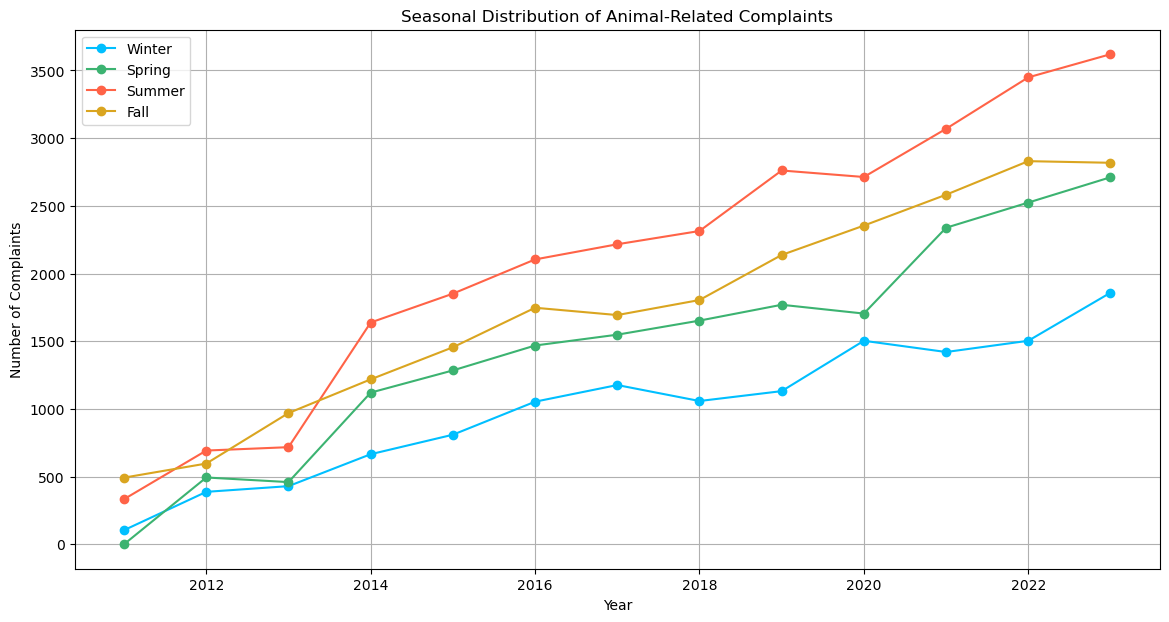

In [7]:
import matplotlib.pyplot as plt

# To provide distinct colors for each season, let's assign a specific color to each one.
season_colors = {
    'Winter': 'deepskyblue',
    'Spring': 'mediumseagreen',
    'Summer': 'tomato',
    'Fall': 'goldenrod'
}
seasonal_complaints_filtered = seasonal_complaints.drop(2024, errors='ignore')

# Plot the seasonal data
plt.figure(figsize=(14, 7))
for season, color in season_colors.items():
    plt.plot(seasonal_complaints_filtered.index, seasonal_complaints_filtered[season], 
             marker='o', label=season, color=color)

plt.title('Seasonal Distribution of Animal-Related Complaints')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.legend()
plt.grid(True)
plt.show()

After establishing the seasonal patterns, we proceed to analyze the distribution of complaints across individual months regardless of the year.

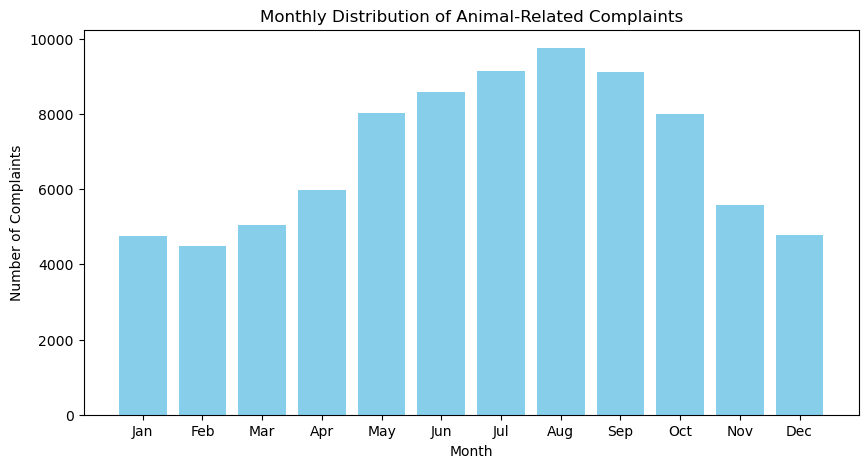

In [8]:
monthly_complaints = data.groupby(data['open_dt'].dt.month).size()

plt.figure(figsize=(10, 5))
plt.bar(monthly_complaints.index, monthly_complaints.values, color='skyblue')
plt.title('Monthly Distribution of Animal-Related Complaints')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

We also look for any patterns in the frequency of complaints on a daily basis over the entire data range.

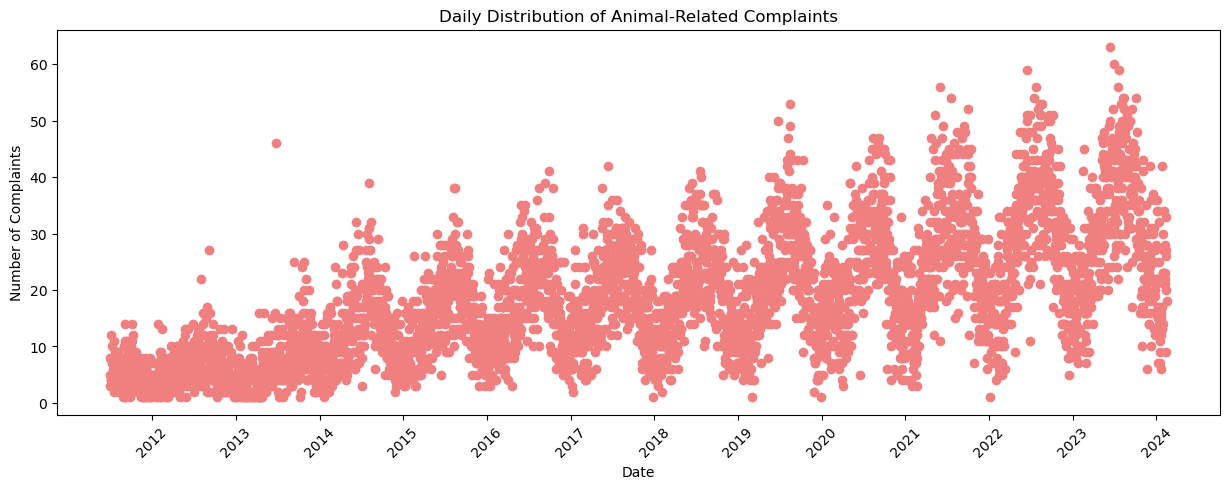

In [18]:

plt.figure(figsize=(15, 5))
plt.plot(daily_complaints.index, daily_complaints.values, 'o', color='lightcoral')
plt.title('Daily Distribution of Animal-Related Complaints')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')

# Set x-axis to show each year
yearly_ticks = pd.date_range(start=daily_complaints.index.min(), end=daily_complaints.index.max(), freq='YS')
plt.xticks(yearly_ticks, [tick.strftime('%Y') for tick in yearly_ticks], rotation=45)

plt.show()

The monthly analysis reveals a peak in complaints during the summer months, with July and August having the highest number of complaints. This observation supports the seasonal trend identified earlier.

In the daily complaint analysis, the data shows peaks that consistently occur in the middle months of the year, which corresponds to the summer season, while troughs or lower frequencies of complaints appear in the edge months, notably aligning with the winter season. This pattern provides further evidence of the seasonal connection.